# K-Means Clustering atau Pengelompokan pada Data Iris

**Nama  : Oki Bagus Rahmat Prakoso**

**NIM   : 210411100183**

**Kelas : Penambangan Data-C**

1. Import library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

#library visualisasi
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

2. Import dataset


In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/okiokib/f40e40e4f076d1dbfcae8775be0c118e/raw/71572b2787bf31f6cdb65905afd8832a74db4c0c/irisDataset.csv')

jumlah_baris = df.shape[0]
df_iris = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].copy()
df_iris.head(jumlah_baris)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


3. Menampikan informasi dataset Iris

In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


4. Mengecek ringkasan statistik deskriptif dari dataset iris.

df_iris.describe() adalah untuk menghasilkan ringkasan statistik dari DataFrame df_iris yang berisi data tentang bunga Iris.

In [5]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


5. Selanjutnya membuat matriks scatter plot dari seluruh pasangan variabel numerik dalam DataFrame. Fungsi ini memungkinkan kita untuk melihat pola hubungan antara dua variabel numerik atau lebih dalam dataset.

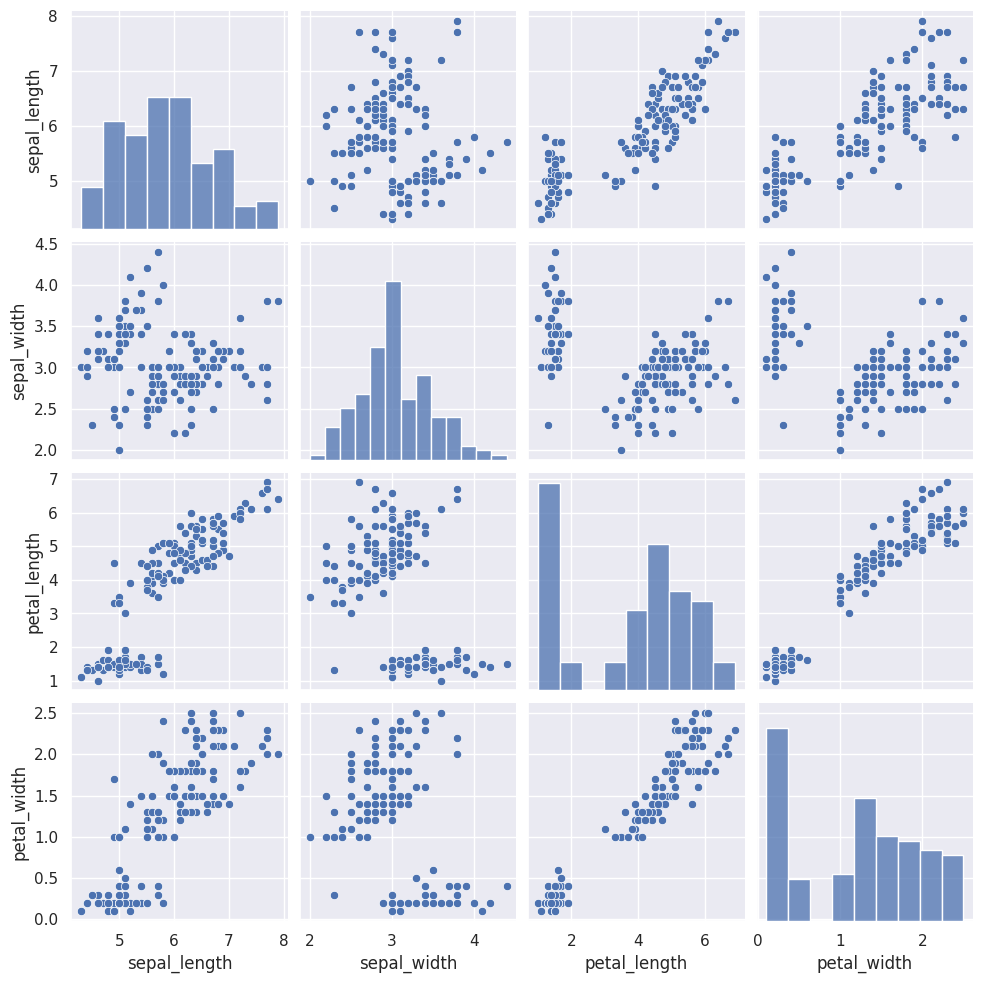

In [6]:
sns.pairplot(df_iris)

6. Fungsi dari x = df_iris.iloc[:, [0,1,2,3]].values adalah untuk mengambil nilai-nilai dari kolom pertama hingga keempat dari DataFrame df_iris dan menyimpannya dalam variabel x sebagai array numpy.Kolom-kolom ini mewakili fitur-fitur numerik yaitu sepal length, sepal width, petal length, dan petal width. Kemudian .values digunakan untuk mengubah DataFrame yang dipilih menjadi array NumPy.

In [7]:
x = df_iris.iloc[:, [0,1,2,3]].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

7. Fungsi dari code tersebut adalah untuk mengimplementasikan metode elbow (elbow method) dalam menentukan jumlah optimal dari klaster (clusters) dalam algoritma K-means clustering.

K-means clustering adalah sebuah metode yang digunakan untuk mengelompokkan data ke dalam klaster-klaster berdasarkan pada kemiripan antar data. Dalam metode elbow, kita ingin menemukan jumlah klaster yang optimal yang dapat menghasilkan hasil klasterisasi yang baik.

Tujuan dari grafik ini adalah untuk menemukan lokasi "siku" pada kurva yang menunjukkan perubahan signifikan dalam penurunan WCSS. Jumlah klaster yang dipilih harus berada sebelum "siku" pada kurva tersebut. Angka ini akan digunakan sebagai jumlah klaster optimal dalam analisis cluster berikutnya.

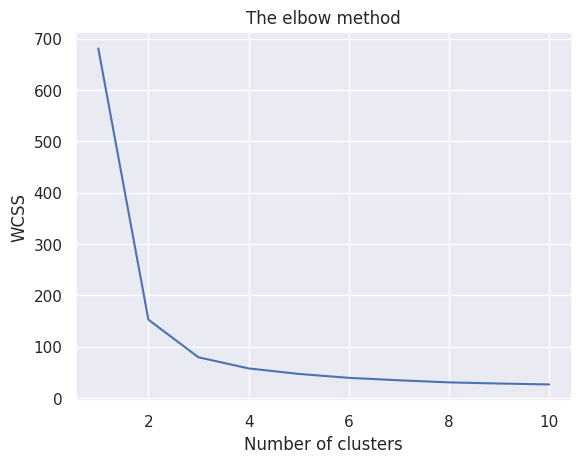

In [8]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.show()

8. Melakukan clustering pada dataset iris menggunakan algoritma KMeans pada Python.

> Penjelasan tiap parameter:

* kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0) membuat objek KMeans dengan parameter sebagai berikut:

* n_clusters=3: Menentukan jumlah klaster yang diinginkan, dalam hal ini 3 klaster.
* init='k-means++': Menggunakan metode inisialisasi "k-means++" yang lebih baik dalam memilih pusat klaster awal.

* max_iter=300: Menentukan jumlah iterasi maksimum yang akan dilakukan oleh algoritma K-means untuk konvergensi.

* n_init=10: Menentukan jumlah inisialisasi awal yang berbeda yang akan dilakukan untuk memilih solusi yang optimal.

* random_state=0: Menentukan seed untuk inisialisasi acak, sehingga hasil yang dihasilkan dapat direproduksi.


y_kmeans = kmeans.fit_predict(x) menjalankan algoritma K-means pada data x dan menghasilkan label klaster untuk setiap sampel. Metode fit_predict() digunakan untuk melakukan pelatihan (fitting) dan prediksi sekaligus. Hasilnya disimpan dalam variabel y_kmeans.

In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

9. Memvisualisasikan hasil clustering dari model K-Means pada data x.

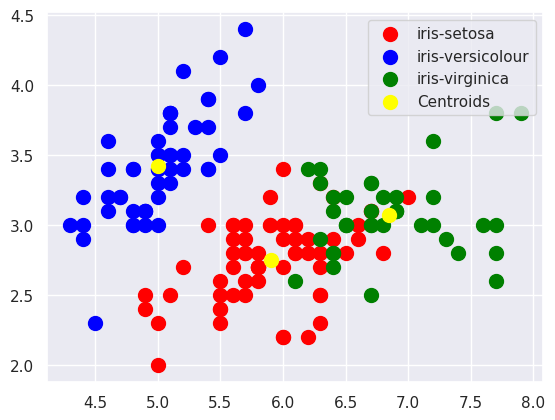

In [10]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label='iris-setosa')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label='iris-versicolour')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label='iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.legend()

## Kesimpulan

Hasil visualisasi menunjukkan bahwa data telah berhasil diklasterisasi menjadi tiga kelompok utama, yaitu iris-setosa, iris-versicolour, dan iris-virginica. Pembagian kelompok ini terlihat cukup merata, namun terdapat kemiripan yang tampak antara kelompok iris-setosa dan iris-virginica.